In [86]:
#pip install researchpy

In [87]:
#pip install merf
## Mixed Effects Regression code reference: https://www.pythonfordatascience.org/mixed-effects-regression-python/

In [88]:
cd ~/anaconda3/envs/qutip-env/lib/python3.6/site-packages/merf


[WinError 3] The system cannot find the path specified: 'C:\\Users\\Jackie.Shi/anaconda3/envs/qutip-env/lib/python3.6/site-packages/merf'
C:\Users\Jackie.Shi\Documents\dissertation


In [89]:
import merf
merf.__file__

'C:\\Users\\Jackie.Shi\\Anaconda3\\lib\\site-packages\\merf\\__init__.py'

In [90]:
import pandas as pd 
import numpy as np 

from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
import os

os. getcwd() 

'C:\\Users\\Jackie.Shi\\Documents\\dissertation'

In [91]:
#loading the data 

data = pd.read_excel('202270\\202270 all data cleaned.xlsx') 
data.fillna(data.median(numeric_only=True).round(1), inplace=True)
data.fillna('', inplace=True)
data.isnull().any(axis=0)
pd.options.display.max_columns = data.shape[1]
data.describe(include='all')

,Student_satisfaction,currentscore,TotalTimesViewed,TotalTimesParticipated,TotalTimesViewHours,Modality,SectionSISID,Enrollments,Instructor_ID,PROGRAM,StudentLevel,PrimaryProgram,Degree,Major,FirstConc,Attributes,GPA,GPAHours,EarnedHours,State,Zip,TERM,Level,TermAdmit,Status,Gender,RegisteredHours,International,CountryofCitizenship,Race,studentid,course,courseid,CourseCode,finalscore,teachyear,EngagementScore,ActiveTimeScore,TEP_Level,PROGRAMcoded,ResponseRate,InState
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513,2513.000000,2513.000000,2.513000e+03,2513,2513,2513,2513,2513,2513,2513,2513.000000,2513.000000,2513.000000,2513,2513,2513.0,2513.000000,2513.000000,2513.000000,2513,2513.000000,2513.000000,2513,2513,2513.000000,2513,2513.000000,2513,2513.000000,2513.000000,2513.000000,2513.000000,2513.00000,2513.000000,2513.000000,2513
unique,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,16,3,3,6,26,56,47,NaN,NaN,NaN,53,1538,NaN,NaN,NaN,NaN,3,NaN,NaN,54,8,NaN,223,NaN,271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,Online Asynchronous,NaN,NaN,NaN,EPM,GR,Y,MS,EPM,,,NaN,NaN,NaN,CO,80210,NaN,NaN,NaN,NaN,F,NaN,NaN,,White,NaN,Capstone Seminar (Online Asynchronous),NaN,COMM-4307-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,2114,NaN,NaN,NaN,432,2216,2257,1345,426,369,1607,NaN,NaN,NaN,1012,92,NaN,NaN,NaN,NaN,1602,NaN,NaN,2162,1702,NaN,92,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501
mean,5.368233,94.043570,117.167131,2.518902,42.926456,NaN,5331.814685,12.493434,8.725359e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.795276,26.538002,26.341027,NaN,NaN,202270.0,1.893752,202170.517310,1.764425,NaN,6.513729,0.100676,NaN,NaN,104507.674891,NaN,150859.681257,NaN,93.407322,6.446164,122.474731,1149.852368,0.31914,12.988460,68.024043,NaN
std,0.363025,8.406923,131.838527,3.517888,58.992840,NaN,191.037259,4.697461,1.212590e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.525502,16.584884,16.171562,NaN,NaN,0.0,0.308215,105.188123,0.424442,NaN,2.623068,0.300960,NaN,NaN,22477.253707,NaN,2318.164586,NaN,8.927698,6.074495,83.822845,598.642444,0.88648,3.773054,16.987298,NaN
min,3.933333,0.900000,1.000000,0.000000,0.000000,NaN,4956.202270,3.000000,8.701058e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,202270.0,1.000000,200670.000000,1.000000,NaN,4.000000,0.000000,NaN,NaN,908.000000,NaN,149675.000000,NaN,0.900000,1.081451,0.000000,7.000000,0.00000,1.000000,25.000000,NaN
25%,5.141428,92.300003,40.000000,0.000000,4.516667,NaN,5195.202270,9.000000,8.718778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.827273,16.000000,16.000000,NaN,NaN,202270.0,2.000000,202110.000000,2.000000,NaN,4.000000,0.000000,NaN,NaN,94237.000000,NaN,149989.000000,NaN,91.330002,2.770705,63.000000,750.000000,0.00000,11.000000,55.560000,NaN
50%,5.428095,96.089996,83.000000,1.000000,24.266667,NaN,5339.202270,12.000000,8.731351e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,24.000000,24.000000,NaN,NaN,202270.0,2.000000,202210.000000,2.000000,NaN,8.000000,0.000000,NaN,NaN,110593.000000,NaN,150168.000000,NaN,95.800000,4.093087,101.000000,1086.000000,0.00000,14.000000,66.670000,NaN
75%,5.656667,98.510002,149.000000,4.000000,57.733333,NaN,5412.202270,16.000000,8.735423e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,32.000000,32.000000,NaN,NaN,202270.0,2.000000,202250.000000,2.000000,NaN,8.000000,0.000000,NaN,NaN,119992.000000,NaN,150249.000000,NaN,98.330002,7.019849,166.000000,1479.000000,0.00000,16.000000,80.950000,NaN


In [92]:
y=data["Student_satisfaction"]
X=data.drop(columns=["Student_satisfaction","finalscore","CourseCode","Instructor_ID","TERM", "studentid","course","courseid","Zip"])

In [93]:
#loading the data 

data2023 = pd.read_excel('202370\\202370 all data cleaned - Copy.xlsx') 
data2023.fillna(data.median(numeric_only=True).round(1), inplace=True)
data2023.fillna('', inplace=True)
data2023.isnull().any(axis=0)
pd.options.display.max_columns = data2023.shape[1]



In [94]:
data2023.describe(include="all")

,teachyear,ID,CourseCode,TotalTimesViewed,TotalTimesParticipated,TotalTimesViewHours,Modality,Enrollments,ResponseRate,Instructor_ID,PROGRAM,TermAdmit,PrimaryProgram,Degree,Major,FirstConc,Guild,Prov,GPA,GPAHours,State,InState,Zip,Class,Status,Gender,International,CountryofCitizenship,Race,Student_satisfaction,Level,CRN,EngagementScore,ActiveTimeScore,currentscore,TEP_Level,PROGRAMcoded
count,2357.000000,2.357000e+03,2357,2357.000000,2357.000000,2357.000000,2357,2357.000000,2357.000000,2.357000e+03,2357,2357.000000,2357,2357,2357,2357,2357.000000,2357.000000,2357.000000,2357.000000,2357,2357,2357,2357,2357.000000,2357,2357.000000,2357,2357,2357.000000,2357.000000,2357,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000
unique,NaN,NaN,283,NaN,NaN,NaN,5,NaN,NaN,NaN,19,NaN,3,6,23,56,NaN,NaN,NaN,NaN,54,2,1428,6,NaN,3,NaN,54,8,NaN,NaN,247,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,EPM-4003-2,NaN,NaN,NaN,Online Asynchronous,NaN,NaN,NaN,EPM,NaN,Y,MS,EPM,,NaN,NaN,NaN,NaN,CO,Y,80210,Graduate,NaN,F,NaN,,White,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,20,NaN,NaN,NaN,1888,NaN,NaN,NaN,410,NaN,2186,1483,414,327,NaN,NaN,NaN,NaN,1228,1230,125,2087,NaN,1520,NaN,1890,1574,NaN,NaN,155,NaN,NaN,NaN,NaN,NaN
mean,5.173889,8.735303e+08,NaN,87.535002,1.974120,31.897625,NaN,12.930844,60.426428,8.726466e+08,NaN,202278.892660,NaN,NaN,NaN,NaN,0.233772,0.052185,3.819129,26.147645,NaN,NaN,NaN,NaN,1.758167,NaN,0.159101,NaN,NaN,5.405052,1.895206,NaN,117.543912,1264.938905,94.317353,0.055579,13.045397
std,4.524960,4.363541e+05,NaN,90.320239,2.656112,42.384313,NaN,4.398146,16.140793,1.183914e+06,NaN,104.488425,NaN,NaN,NaN,NaN,0.423318,0.222447,0.459428,16.779993,NaN,NaN,NaN,NaN,0.428284,NaN,0.365847,NaN,NaN,0.398815,0.306353,NaN,90.192208,807.272083,8.012470,0.229156,3.660238
min,0.643395,8.700766e+08,NaN,0.000000,0.000000,0.000000,NaN,3.000000,11.110000,8.701140e+08,NaN,201450.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,2.277778,1.000000,NaN,0.000000,117.000000,14.150000,0.000000,1.000000
25%,2.535250,8.735994e+08,NaN,29.000000,0.000000,3.141667,NaN,10.000000,50.000000,8.720511e+08,NaN,202230.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,3.840000,16.000000,NaN,NaN,NaN,NaN,2.000000,NaN,0.000000,NaN,NaN,5.255556,2.000000,NaN,52.000000,773.000000,92.989998,0.000000,11.000000
50%,4.100000,8.736652e+08,NaN,63.000000,1.000000,18.340000,NaN,12.000000,61.900000,8.732065e+08,NaN,202310.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,4.000000,24.000000,NaN,NaN,NaN,NaN,2.000000,NaN,0.000000,NaN,NaN,5.472778,2.000000,NaN,101.000000,1091.000000,96.540001,0.000000,14.000000
75%,5.511293,8.736993e+08,NaN,114.000000,3.000000,43.310556,NaN,16.000000,68.750000,8.735655e+08,NaN,202370.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,4.000000,32.000000,NaN,NaN,NaN,NaN,2.000000,NaN,0.000000,NaN,NaN,5.666667,2.000000,NaN,157.000000,1470.000000,98.800003,0.000000,16.000000


In [95]:
y2023=data2023["Student_satisfaction"]
X2023=data2023.drop(columns=["Student_satisfaction","CourseCode","Instructor_ID", "ID","Zip"])

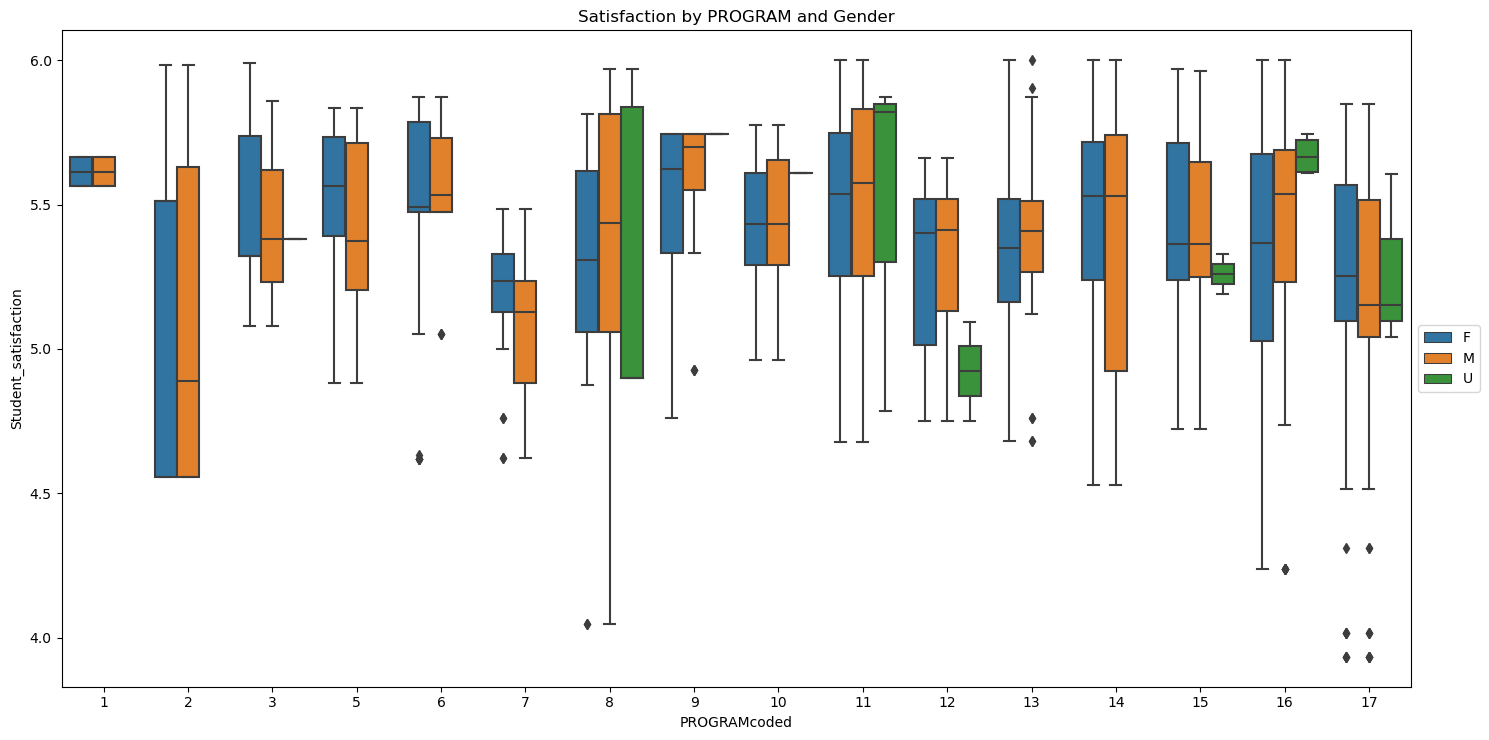

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 7.5))

sns.boxplot(data=data, x='PROGRAMcoded', y='Student_satisfaction', hue='Gender', ax=ax)

ax.set_title('Satisfaction by PROGRAM and Gender')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()

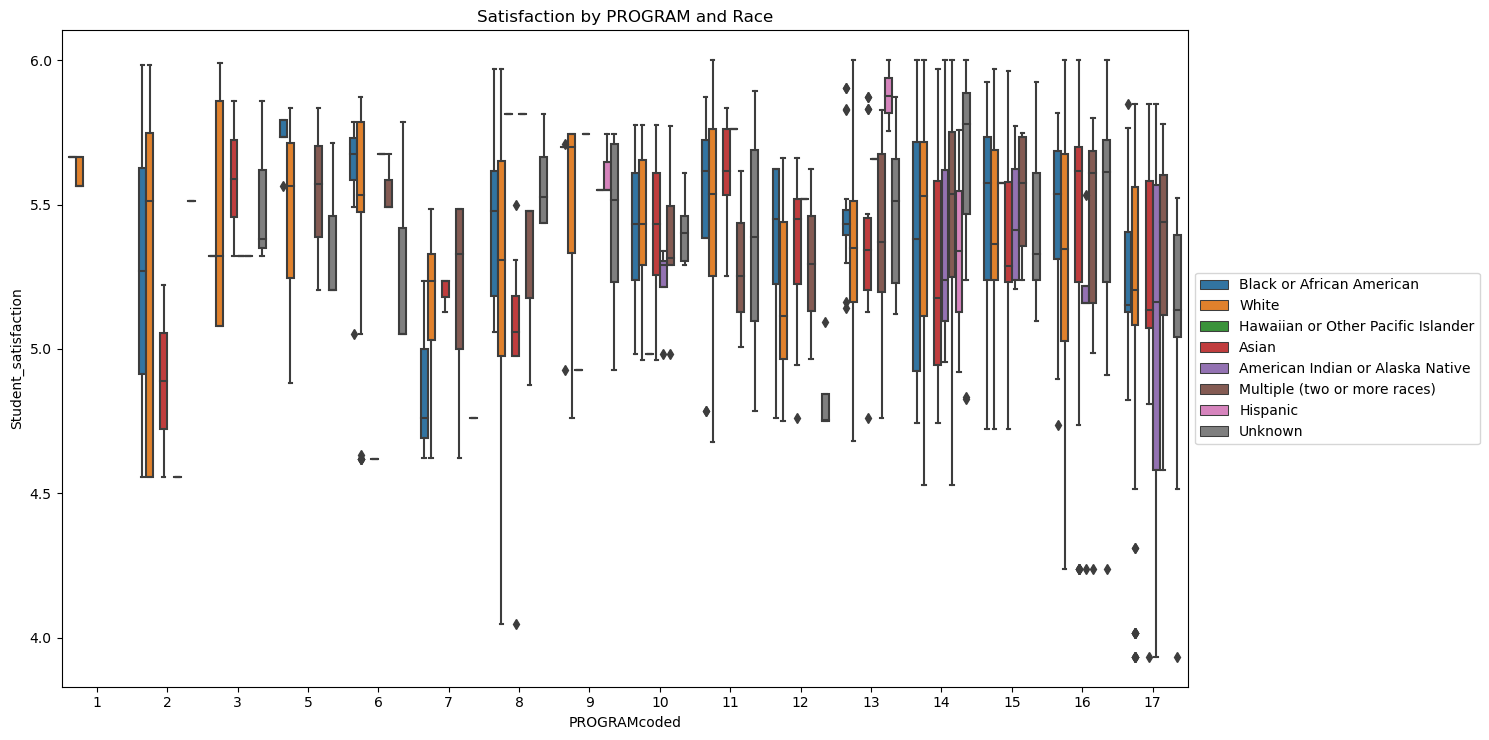

In [97]:
fig, ax = plt.subplots(figsize=(15, 7.5))

sns.boxplot(data=data, x='PROGRAMcoded', y='Student_satisfaction', hue='Race', ax=ax)

ax.set_title('Satisfaction by PROGRAM and Race')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()

In [98]:
# Leading Factors from RF:
#teachyear: 0.0804
#courseid: 0.0674
#Instructor_ID: 0.0660
#Enrollments: 0.0558
#SectionSISID: 0.0453
#studentid: 0.0016

OLSformula='''Student_satisfaction ~ teachyear + courseid + Instructor_ID + Enrollments + SectionSISID + studentid + 
        TotalTimesViewed + TotalTimesParticipated + TotalTimesViewHours + TEP_level + StudentLevel + PrimaryProgram + 
        GPA + GPAHours + EarnedHours + RegisteredHours + 
        Zip + International + C(Race) + Level + TermAdmit + Status + 
        C(Modality) + C(Degree) + C(Major) + C(FirstConc) + 
        C(PROGRAM) + C(Gender, PROGRAM("F"))''',

In [99]:
##OLS
import statsmodels.formula.api as smf

ols_model = smf.ols("Student_satisfaction ~ teachyear + Enrollments + TotalTimesViewed + TotalTimesParticipated + TotalTimesViewHours + EngagementScore + ActiveTimeScore + TEP_Level + StudentLevel + GPA + GPAHours+ C(Race) + Level + Status + C(Modality) + C(Degree) + C(Major) + C(PROGRAM) + C(Gender) + International", data=data).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Student_satisfaction   R-squared:                       0.137
Model:                              OLS   Adj. R-squared:                  0.112
Method:                   Least Squares   F-statistic:                     5.682
Date:                  Fri, 31 May 2024   Prob (F-statistic):           5.99e-42
Time:                          09:16:57   Log-Likelihood:                -834.48
No. Observations:                  2513   AIC:                             1807.
Df Residuals:                      2444   BIC:                             2209.
Df Model:                            68                                         
Covariance Type:              nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         1.4429      0.030     47.988      0.000       1.384       1.502
StudentLevel[T.GR]                               -0.0045      0.064     -0.071      0.944      -0.131       0.122
StudentLevel[T.UC]                                0.9043      0.045     20.236      0.000       0.817       0.992
C(Race)[T.Asian]                                  0.0407      0.067      0.604      0.546      -0.091       0.173
C(Race)[T.Black or African American]              0.0867      0.066      1.311      0.190      -0.043       0.216
C(Race)[T.Hawaiian or Other Pacific Islander]    -0.0697      0.185     -0.376      0.707      -0.432       0.293
C(Race)[T.Hispanic]                               0.2232      0.171      1.305      0.192      -0.112       0.558
C(Race)[T.Multiple (two or more races)]           0.0728      0.070      1.036      0.300      -0.065       0.211
C(Race)[T.Unknown]                                0.0613      0.071      0.869      0.385      -0.077       0.200
C(Race)[T.White]                                  0.0455      0.062      0.728      0.467      -0.077       0.168
C(Modality)[T.Hybrid Hyflex]                      0.0694      0.086      0.806      0.420      -0.099       0.238
C(Modality)[T.Hybrid Online]                      0.0275      0.071      0.387      0.698      -0.112       0.166
C(Modality)[T.Online Asynchronous]               -0.1126      0.028     -3.991      0.000      -0.168      -0.057
C(Modality)[T.Online Synchronous]                 0.1920      0.060      3.204      0.001       0.074       0.309
C(Degree)[T.BA]                                   0.9043      0.045     20.236      0.000       0.817       0.992
C(Degree)[T.CRTG]                                 0.0134      0.026      0.521      0.602      -0.037       0.064
C(Degree)[T.CRTM]                                 0.0458      0.029      1.608      0.108      -0.010       0.102
C(Degree)[T.MA]                                   0.0059      0.036      0.164      0.870      -0.065       0.077
C(Degree)[T.MS]                                  -0.0698      0.026     -2.715      0.007      -0.120      -0.019
C(Major)[T.ARCM]                                  0.1067      0.101      1.056      0.291      -0.091       0.305
C(Major)[T.CA]                                    0.1409      0.057      2.452      0.014       0.028       0.254
C(Major)[T.CMA]                                  -0.0650      0.062     -1.053      0.293      -0.186       0.056
C(Major)[T.ENS]                                   0.4044      0.218      1.855      0.064      -0.023       0.832
C(Major)[T.EPM]                                   0.0614      0.069      0.889      0.374      -0

In [100]:
##Modify OLS based on p value for variables
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf

ols_model2 = smf.ols("Student_satisfaction ~ EngagementScore + ActiveTimeScore + TEP_Level + StudentLevel + Level + C(Modality) + International", data=data).fit()

ols_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Student_satisfaction   R-squared:                       0.058
Model:                              OLS   Adj. R-squared:                  0.054
Method:                   Least Squares   F-statistic:                     15.46
Date:                  Fri, 31 May 2024   Prob (F-statistic):           3.36e-27
Time:                          09:16:57   Log-Likelihood:                -943.59
No. Observations:                  2513   AIC:                             1909.
Df Residuals:                      2502   BIC:                             1973.
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              1.7964      0.012    146.705      0.000       1.772       1.820
StudentLevel[T.GR]                    -0.0557      0.065     -0.855      0.392      -0.183       0.072
StudentLevel[T.UC]                     1.7985      0.039     46.544      0.000       1.723       1.874
C(Modality)[T.Hybrid Hyflex]          -0.0453      0.082     -0.552      0.581      -0.206       0.116
C(Modality)[T.Hybrid Online]           0.1445      0.062      2.312      0.021       0.022       0.267
C(Modality)[T.Online Asynchronous]    -0.0830      0.027     -3.030      0.002      -0.137      -0.029
C(Modality)[T.Online Synchronous]      0.1743      0.044      3.942      0.000       0.088       0.261
EngagementScore                        0.0003      0.000      2.883      0.004    9.42e-05       0.000
ActiveTimeScore                     3.272e-05   1.44e-05      2.271      0.023    4.47e-06     6.1e-05
TEP_Level                              0.0443      0.008      5.274      0.000       0.028       0.061
Level                                  1.7942      0.034     53.118      0.000       1.728       1.860
International                          0.0513      0.027      1.921      0.055      -0.001       0.104
==============================================================================
Omnibus:                      221.201   Durbin-Watson:                   0.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.038
Skew:                          -0.727   Prob(JB):                     1.91e-65
Kurtosis:                       3.854   Cond. No.                     6.15e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\Jackie.Shi\AppData\Local\Temp\ipykernel_7884\772022190.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ols_model2.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)
C:\Users\Jackie.Shi\Anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Text(0.5, 0, 'Residuals')

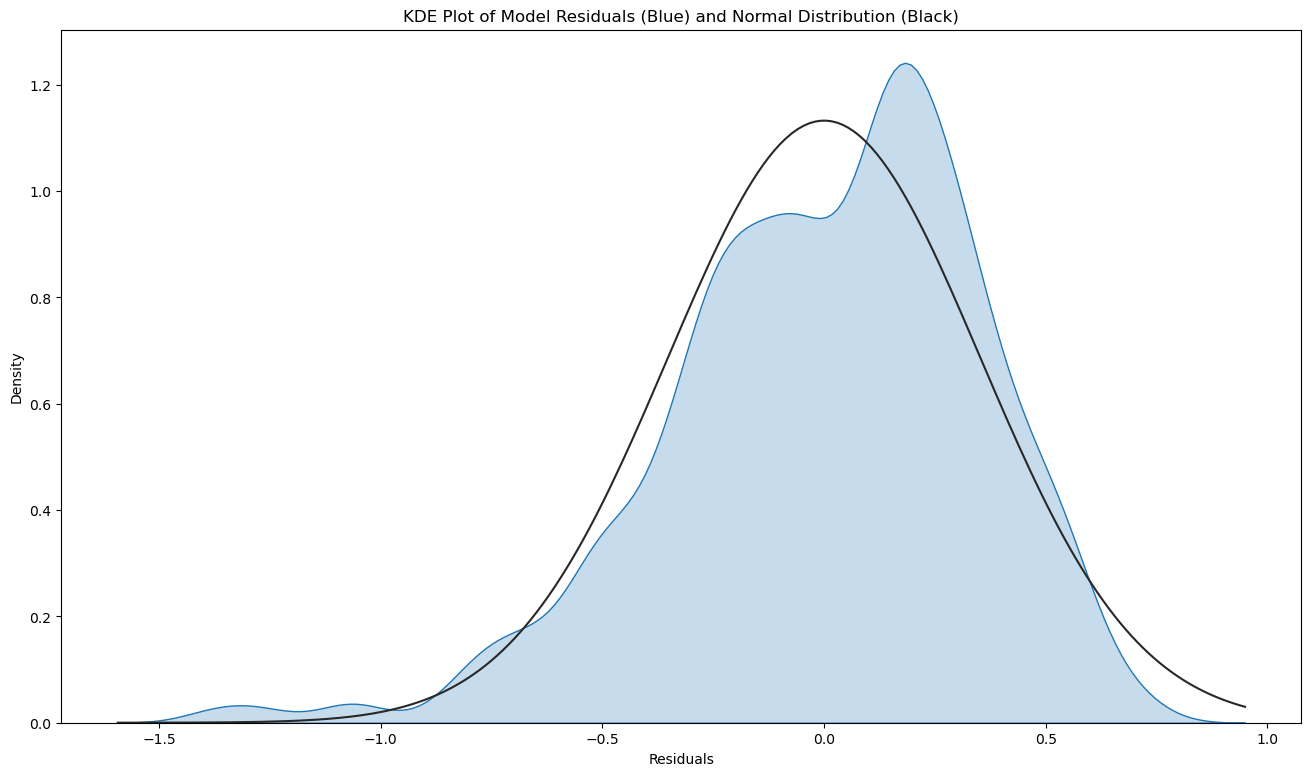

In [101]:
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats

##CHECK NOMALITY
fig = plt.figure(figsize = (16, 9))

ax = sns.distplot(ols_model2.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

Text(0.5, 1.0, 'Q-Q Plot')

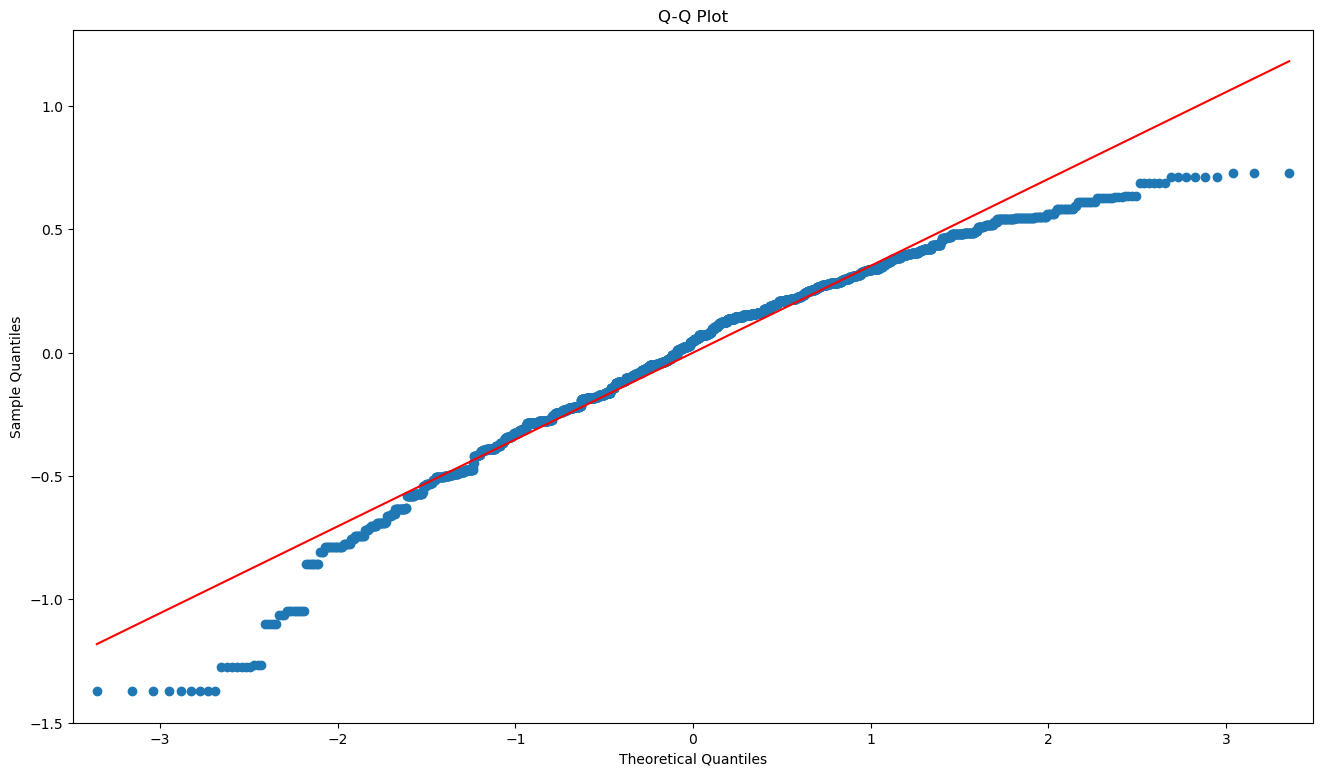

In [102]:
## Q-Q PLot

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(ols_model2.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")

In [103]:
#Shapir-Wilk test of normality
labels = ["Statistic", "p-value"]

norm_res = stats.shapiro(ols_model2.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)


#The test is significant which indicates that the assumption of normality for the residuals is violated. 
#This would suggest that the model could be adjusted to meet this assumption. Common techniques include transform variables, 
#remove outliers, use a non-parametric approach, or rely on the central limit theorem. 
#Transformations and the backtransformations are covered on parametric assumptions page.

Statistic 0.9686973690986633
p-value 5.549948226059561e-23


Text(0, 0.5, 'Residuals')

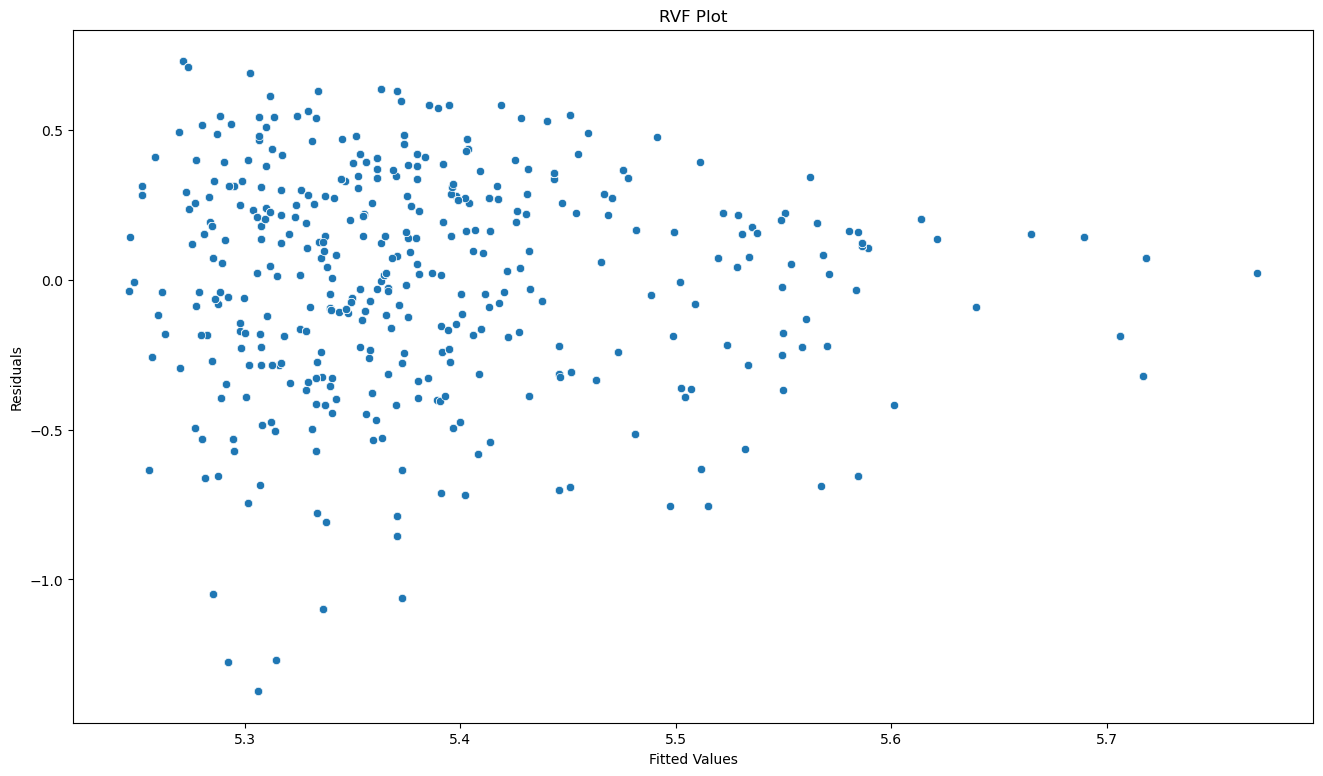

In [104]:

###check for homoskedasticity visually, this can be done with an RVF Plot (residuals versus fitted values) and a boxplot.
fig = plt.figure(figsize = (16, 9))

ax = sns.scatterplot(y = ols_model2.resid, x = ols_model2.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")

In [105]:
# Random Intercept Model
# formula = "Student_satisfaction ~ teachyear + courseid + Enrollments + studentid + TotalTimesViewed + TotalTimesParticipated + TotalTimesViewHours + TEP_level + StudentLevel + PrimaryProgram + GPA + GPAHours + Level + Status + C(State) + C(Race) + C(Modality) + C(Degree) + C(Major) + C(Gender) + International"

rim_model1 = smf.mixedlm("Student_satisfaction ~  EngagementScore + ActiveTimeScore + TEP_Level + GPA + GPAHours + International", 
                         data, groups="PROGRAM").fit()
rim_model1.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
==================================================================
Model:            MixedLM Dependent Variable: Student_satisfaction
No. Observations: 2513    Method:             REML                
No. Groups:       16      Scale:              0.1198              
Min. group size:  10      Log-Likelihood:     -953.2519           
Max. group size:  432     Converged:          Yes                 
Mean group size:  157.1                                           
-------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------------
Intercept            5.366     0.061  88.374  0.000   5.247   5.485
EngagementScore      0.000     0.000   1.512  0.131  -0.000   0.000
ActiveTimeScore      0.000     0.000   2.798  0.005   0.000   0.000
TEP_Level            0.042     0.008   4.986  0.000   0.025   0.059
GPA                 -0.024     0.014  -1.751  0.080  -0.050   0.003
GPAHours             0.001     0.000   2.572  0.010   0.000   0.002
International        0.104     0.026   3.985  0.000   0.053   0.155
PROGRAM Var          0.011     0.014                               
==================================================================

"""

Text(0.5, 0, 'Modality')

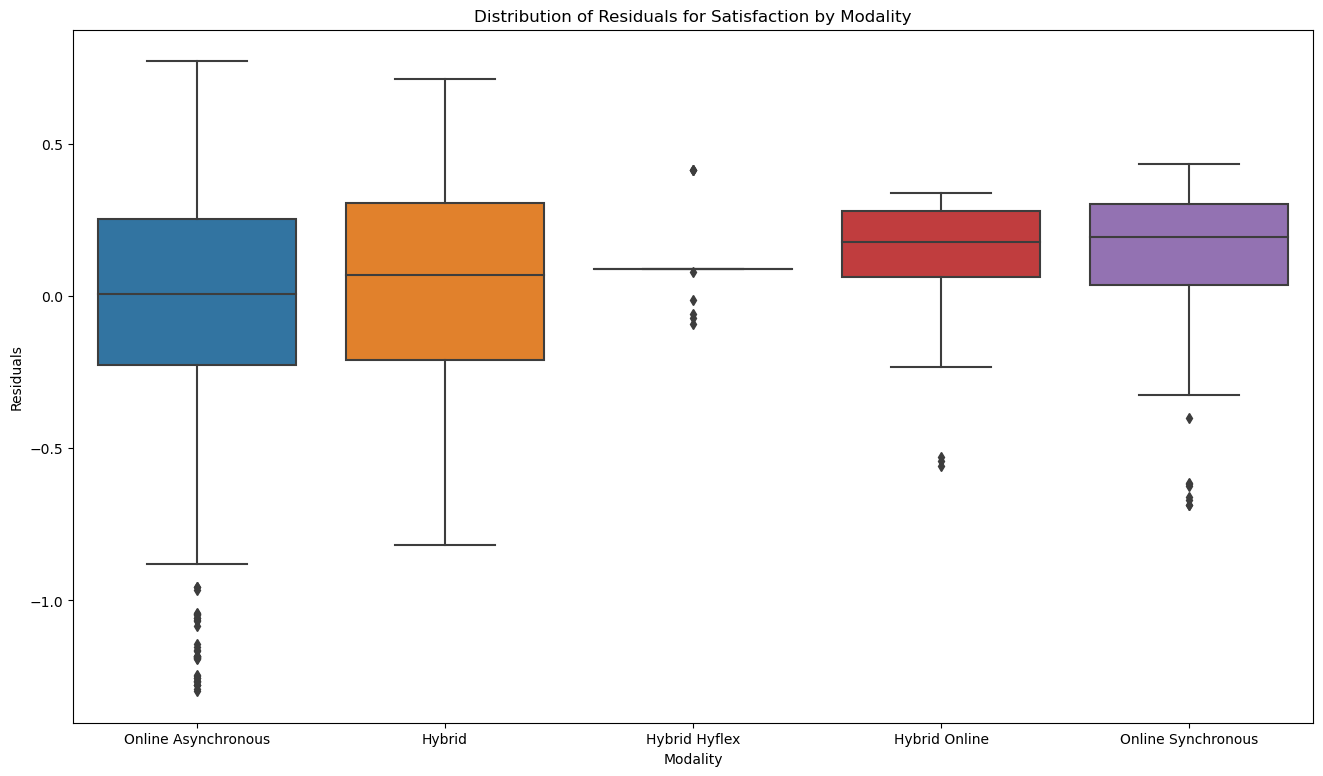

In [106]:
#Box plot to see outliers 
fig = plt.figure(figsize = (16, 9))

ax = sns.boxplot(x = data["Modality"], y = rim_model1.resid)

ax.set_title("Distribution of Residuals for Satisfaction by Modality")
ax.set_ylabel("Residuals")
ax.set_xlabel("Modality")

Based on the visual tests, it appears that there isn't much concern about violating the assumption of homoskedasticity of 
the variance.
The formal testing indicates this assumption is violated.???

To address this, one could assess the model for outliers, or transform variables.

In [107]:
rp.summary_cont(data.groupby(["PROGRAMcoded", "Modality"])["Student_satisfaction"])

C:\Users\Jackie.Shi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2343: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\Jackie.Shi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2344: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


N    Mean      SD      SE  95% Conf.  \
PROGRAMcoded Modality                                                      
1            Online Asynchronous   10  5.6140  0.0535  0.0169     5.5758   
2            Online Asynchronous   25  5.2083  0.5919  0.1184     4.9639   
3            Online Asynchronous   34  5.4478  0.3224  0.0553     5.3353   
5            Hybrid                 3  5.7143  0.0000  0.0000        NaN   
             Hybrid Online         25  5.5384  0.3011  0.0602     5.4141   
             Online Asynchronous   29  5.4511  0.2193  0.0407     5.3676   
6            Online Asynchronous   82  5.4811  0.3594  0.0397     5.4022   
7            Hybrid Hyflex         15  5.2352  0.0000  0.0000        NaN   
             Online Asynchronous   70  5.1371  0.2782  0.0332     5.0708   
8            Hybrid                25  5.2818  0.4684  0.0937     5.0884   
             Hybrid Online          4  5.6505  0.0000  0.0000        NaN   
             Online Asynchronous   62  5.3241  0.4065  0.0516     5.2209   
9            Online Synchronous    52  5.5210  0.3095  0.0429     5.4348   
10           Hybrid                14  5.3179  0.2262  0.0605     5.1873   
             Online Asynchronous  106  5.3732  0.2604  0.0253     5.3231   
             Online Synchronous    25  5.6959  0.0838  0.0168     5.6613   
11           Hybrid Online          8  5.7476  0.0000  0.0000        NaN   
             Online Asynchronous  137  5.4564  0.3533  0.0302     5.3967   
12           Hybrid                51  5.4014  0.1488  0.0208     5.3595   
             Online Asynchronous  106  5.2360  0.3038  0.0295     5.1775   
13           Hybrid                19  5.4354  0.3185  0.0731     5.2819   
             Online Asynchronous  198  5.3715  0.2847  0.0202     5.3316   
             Online Synchronous    24  5.5335  0.1966  0.0401     5.4505   
14           Hybrid                 9  4.8058  0.1889  0.0630     4.6606   
             Online Asynchronous  259  5.4220  0.3926  0.0244     5.3739   
15           Hybrid Online          2  5.6833  0.0000  0.0000        NaN   
             Online Asynchronous  270  5.4438  0.2930  0.0178     5.4087   
16           Hybrid                89  5.5517  0.2730  0.0289     5.4942   
             Hybrid Hyflex          6  5.4800  0.2233  0.0911     5.2457   
             Online Asynchronous  322  5.3375  0.3823  0.0213     5.2956   
17           Hybrid                28  5.5335  0.2670  0.0505     5.4300   
             Online Asynchronous  404  5.2137  0.4170  0.0207     5.1730   

                                  Interval  
PROGRAMcoded Modality                       
1            Online Asynchronous    5.6523  
2            Online Asynchronous    5.4526  
3            Online Asynchronous    5.5603  
5            Hybrid                    NaN  
             Hybrid Online          5.6627  
             Online Asynchronous    5.5345  
6            Online Asynchronous    5.5601  
7            Hybrid Hyflex             NaN  
             Online Asynchronous    5.2034  
8            Hybrid                 5.4751  
             Hybrid Online             NaN  
             Online Asynchronous    5.4273  
9            Online Synchronous     5.6071  
10           Hybrid                 5.4485  
             Online Asynchronous    5.4234  
             Online Synchronous     5.7305  
11           Hybrid Online             NaN  
             Online Asynchronous    5.5161  
12           Hybrid                 5.4432  
             Online Asynchronous    5.2945  
13           Hybrid                 5.5889  
             Online Asynchronous    5.4114  
             Online Synchronous     5.6166  
14           Hybrid                 4.9510  
             Online Asynchronous    5.4700  
15           Hybrid Online             NaN  
             Online Asynchronous    5.4789  
16           Hybrid                 5.6092  
             Hybrid Hyflex          5.7143  
             Online Asynchronous    5.3794  
17         

In [108]:
# *********
# Random Slope Model: No Correlation Between Random Intercept And Slopes
# Using the same data, a random slope model will be fit where the random intercepts and slopes are independent. 
# In this model, a random slope will be allowed for the PROGRAM.

vc = {'PROGRAMcoded': '0 + PROGRAMcoded'}
rsm_model2 = smf.mixedlm("Student_satisfaction ~ EngagementScore + ActiveTimeScore + TotalTimesViewHours + TEP_Level + GPA + GPAHours + C(Modality) + International", 
                         data, groups="PROGRAMcoded", vc_formula=vc).fit()

rsm_model2.summary()

C:\Users\Jackie.Shi\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
=============================================================================
Model:                 MixedLM    Dependent Variable:    Student_satisfaction
No. Observations:      2513       Method:                REML                
No. Groups:            16         Scale:                 0.1177              
Min. group size:       10         Log-Likelihood:        -944.8630           
Max. group size:       432        Converged:             Yes                 
Mean group size:       157.1                                                 
-----------------------------------------------------------------------------
                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                           5.442    0.065 83.964 0.000  5.315  5.569
C(Modality)[T.Hybrid Hyflex]        0.011    0.084  0.131 0.896 -0.154  0.176
C(Modality)[T.Hybrid Online]        0.052    0.067  0.777 0.437 -0.079  0.183
C(Modality)[T.Online Asynchronous] -0.114    0.027 -4.208 0.000 -0.168 -0.061
C(Modality)[T.Online Synchronous]   0.167    0.054  3.062 0.002  0.060  0.274
EngagementScore                     0.000    0.000  3.216 0.001  0.000  0.001
ActiveTimeScore                     0.000    0.000  2.400 0.016  0.000  0.000
TotalTimesViewHours                 0.000    0.000  1.290 0.197 -0.000  0.000
TEP_Level                           0.037    0.008  4.460 0.000  0.021  0.054
GPA                                -0.025    0.013 -1.835 0.066 -0.051  0.002
GPAHours                            0.001    0.000  2.839 0.005  0.000  0.002
International                       0.061    0.028  2.152 0.031  0.005  0.116
PROGRAMcoded Var                    0.000    0.000                           
=============================================================================

"""

In [109]:
#White’s Lagrange Multiplier Test for Heteroscedasticity
from statsmodels.stats.diagnostic import het_white

het_white_res = het_white(rsm_model2.resid, rsm_model2.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

LM Statistic 133.76966210898195
LM-Test p-value 1.1242954764397635e-06
F-Statistic 2.1166144359804417
F-Test p-value 6.903001717760969e-07


In [110]:
# BETTER Random Slope Model: Random intercepts and slopes are correlated
# In this model, a random slope will be allowed for the Program.

rsm_model3 = smf.mixedlm("Student_satisfaction ~ EngagementScore + ActiveTimeScore + teachyear + TEP_Level + GPA + GPAHours + C(Modality) + International"
                     , data, groups= "PROGRAMcoded",
                     re_formula = "1 + PROGRAMcoded").fit()

rsm_model3.summary()

C:\Users\Jackie.Shi\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
=============================================================================
Model:                 MixedLM    Dependent Variable:    Student_satisfaction
No. Observations:      2513       Method:                REML                
No. Groups:            16         Scale:                 0.1174              
Min. group size:       10         Log-Likelihood:        -939.2970           
Max. group size:       432        Converged:             Yes                 
Mean group size:       157.1                                                 
-----------------------------------------------------------------------------
                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                           5.414    0.065 82.992 0.000  5.286  5.542
C(Modality)[T.Hybrid Hyflex]        0.029    0.084  0.339 0.735 -0.137  0.194
C(Modality)[T.Hybrid Online]        0.037    0.069  0.531 0.595 -0.099  0.172
C(Modality)[T.Online Asynchronous] -0.111    0.027 -4.101 0.000 -0.165 -0.058
C(Modality)[T.Online Synchronous]   0.173    0.054  3.184 0.001  0.066  0.279
EngagementScore                     0.000    0.000  2.880 0.004  0.000  0.001
ActiveTimeScore                     0.000    0.000  2.674 0.007  0.000  0.000
teachyear                           0.001    0.001  0.815 0.415 -0.001  0.003
TEP_Level                           0.037    0.008  4.382 0.000  0.020  0.053
GPA                                -0.024    0.013 -1.758 0.079 -0.050  0.003
GPAHours                            0.001    0.000  2.684 0.007  0.000  0.002
International                       0.064    0.028  2.296 0.022  0.009  0.119
PROGRAMcoded Var                    0.031    0.088                           
PROGRAMcoded x PROGRAMcoded Cov    -0.002    0.008                           
PROGRAMcoded Var                    0.000    0.001                           
=============================================================================

"""

In [111]:
# Select only the columns of interest
columns_of_interest = [
    'teachyear', 'TotalTimesViewed', 'TotalTimesParticipated', 'TotalTimesViewHours',
    'Enrollments', 'ResponseRate', 'TermAdmit', 'GPA', 'GPAHours',
    'Status', 'International', 'Student_satisfaction', 'Level', 'EngagementScore',
    'ActiveTimeScore', 'currentscore', 'TEP_Level'
]

# Filter the DataFrame to these columns
filtered_df = data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = filtered_df.corr()

# Print or return the correlation matrix
print(correlation_matrix)

                        teachyear  TotalTimesViewed  TotalTimesParticipated  \
teachyear                1.000000         -0.093180               -0.070972   
TotalTimesViewed        -0.093180          1.000000                0.438039   
TotalTimesParticipated  -0.070972          0.438039                1.000000   
TotalTimesViewHours     -0.068021          0.815732                0.353006   
Enrollments             -0.027048          0.052233                0.017406   
ResponseRate             0.028630          0.009950               -0.033975   
TermAdmit               -0.045317          0.081109                0.008784   
GPA                      0.001255         -0.020955               -0.036492   
GPAHours                 0.062501         -0.049768               -0.002733   
Status                  -0.007446         -0.134877               -0.054338   
International           -0.064975          0.197647                0.113822   
Student_satisfaction     0.008057          0.022090 

In [112]:

# Recode column names to numerical values
recode_map = {name: idx+1 for idx, name in enumerate(correlation_matrix.columns)}
correlation_matrix_renamed = correlation_matrix.rename(columns=recode_map)

# Round the correlation matrix to two decimal points
correlation_matrix_rounded = correlation_matrix_renamed.round(2)

output_file_path = 'rounded_correlation_matrix.xlsx'  # Define the path and filename
correlation_matrix_rounded.to_excel(output_file_path, index=True)

In [113]:

# Extracting variance components
variance_components = rsm_model3.cov_re
print("Variance Components:")
print(variance_components)


Variance Components:
              PROGRAMcoded  PROGRAMcoded
PROGRAMcoded      0.030740     -0.001844
PROGRAMcoded     -0.001844      0.000137


In [114]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Create a null model
null_formula = "Student_satisfaction ~ 1"
null_model = smf.mixedlm(null_formula, data=data, groups=data['PROGRAM']).fit()

# Calculate pseudo-R-squared manually
pseudo_r_squared = 1 - (rsm_model3.llf / null_model.llf)

# Print the pseudo-R-squared value
print("Pseudo R-squared:", pseudo_r_squared)

Pseudo R-squared: 0.025074874690915072


In [115]:
# Get the residuals
residuals = rsm_model3.resid

# Compute Mean Squared Error (MSE)
mse = (residuals ** 2).mean()

# Print the MSE value
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.11627635607732813


Pseudo R-squared:
In this example, llf is the log-likelihood of the model, and the pseudo-R-squared is calculated as 1 minus the ratio of the log-likelihood of the full model to that of the null model.

RF Average R-squared: 0.0141
Average Negative Mean Squared Error: 0.0141

###### ConvergenceWarning: can't find best fit for the data.

Although our analogy to hiking is going up, it usually means the model has reached the lowest point in the cost function.

Remember, reaching convergence doesn’t necessarily mean the model is perfect.

It just means the model can’t do any better with the current setup.

It’s always important to evaluate your model to make sure it’s making good predictions.

Scale: The estimated scale parameter or residual standard deviation. It represents the standard deviation of the residuals, giving an indication of the spread of the observed responses around the predicted values.

Log-Likelihood: The log-likelihood of the model, a measure of how well the model explains the observed data.

AIC and BIC: Information criteria that balance goodness of fit with model complexity. Lower AIC and BIC values generally indicate a better-fitting model.

###### re_formula: 
re_formula: str
A one-sided formula defining the variance structure of the model. The default gives a random intercept for each group.

vc_formula: dict-like
Formulas describing variance components. vc_formula[vc] is the formula for the component with variance parameter named vc. 
The formula is processed into a matrix, and the columns of this matrix are linearly combined with independent random 
coefficients having mean zero and a common variance.

z-score:
standardised: any estimated coefficient from our regression model later on are all on the same scale, scaled to have zero mean and unit variance (the z-score)

Performance
Let’s look at the non-validated performance measures. The MAE, RMSE, MAPE and 
 are all comparable between these models, but the log-likelihood is better for the random intercept, random slope model.

RIS: random intercept, random slope

RIM: random intercept

RSM: random slope

OLS: ordinary least square



ols_model2 = smf.ols("Student_satisfaction ~ EngagementScore + ActiveTimeScore + teachyear + courseid  + TotalTimesViewHours + TEP_level + StudentLevel + GPA + C(Race) + C(PROGRAM) + Level + C(Modality) + C(Gender) + International", data=data).fit()

rim_model1 = smf.mixedlm("Student_satisfaction ~ EngagementScore + ActiveTimeScore + teachyear + courseid + TEP_level + GPA + GPAHours + International", data, groups="PROGRAMcoded").fit()

rsm_model2 = smf.mixedlm("Student_satisfaction ~ EngagementScore + ActiveTimeScore + TotalTimesViewHours + TEP_level + GPA + GPAHours + C(Modality) + International", data, groups="PROGRAMcoded", vc_formula=vc).fit()

rsm_model3 = smf.mixedlm("Student_satisfaction ~ EngagementScore + ActiveTimeScore + teachyear + TEP_level + GPA + GPAHours + C(Modality) + International"
                     , data, groups= "PROGRAMcoded",
                     re_formula = "1 + PROGRAMcoded").fit()

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def get_performance(m, X, y_true, Z=None, clusters=None):
    if Z is not None and clusters is not None:
        y_pred = m.predict(X, Z, clusters)
    else:
        y_pred  = m.predict(X)

    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rsq = r2_score(y_true, y_pred)

    try:
        ll = m.llf
    except:
        ll = np.nan

    y_pred = pd.Series([mae, rmse, mape, rsq, ll], index=['mae', 'rmse', 'mape', 'r-sq', 'log-likelihood'])
    return y_pred

#############################
lmer_df = pd.DataFrame([get_performance(m, data.drop(columns=['Student_satisfaction']), data['Student_satisfaction'])
              for m in [ols_model2, rim_model1, rsm_model2, rsm_model3]],
             index=['OLS', 'RIM', 'RSM', 'RSM2']) \
    .sort_values(['log-likelihood'], ascending=False)
lmer_df

,mae,rmse,mape,r-sq,log-likelihood
RSM2,0.281681,0.352162,0.053986,0.058577,-939.297039
OLS,0.281217,0.352236,0.053834,0.058183,-943.590865
RSM,0.280683,0.353355,0.054024,0.052189,-944.863037
RIM,0.284721,0.357574,0.054772,0.029421,-953.251909


In [117]:
###HLM use 2023 data
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse

# Assuming you have a mixed-effects model already trained (rsm_model)
# Replace rsm_model with the actual name of your mixed-effects model

# Split the 2022 data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.5, random_state=42)

# Fit the model on the training data
train_model = smf.mixedlm("Student_satisfaction ~ EngagementScore + ActiveTimeScore + teachyear + TEP_Level + GPA + GPAHours + C(Modality) + International", 
                          train_data, groups= "PROGRAMcoded", re_formula = "1 + PROGRAMcoded").fit()

# Make predictions on the test set (data2023)
test_predictions = train_model.predict(data2023)

# Evaluate the predictions using Mean Squared Error (MSE)
test_actual_values = data2023['Student_satisfaction']  # Assuming 'Student_satisfaction' is your dependent variable
test_mse = mse(test_actual_values, test_predictions)

# Print the MSE on the test set
print("Mean Squared Error (MSE) on the test set (data2023):", test_mse)


Mean Squared Error (MSE) on the test set (data2023): 0.16084061752275922


C:\Users\Jackie.Shi\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


!!!!! RF Average R-squared: 0.0141
RF Average Negative Mean Squared Error: 0.0141

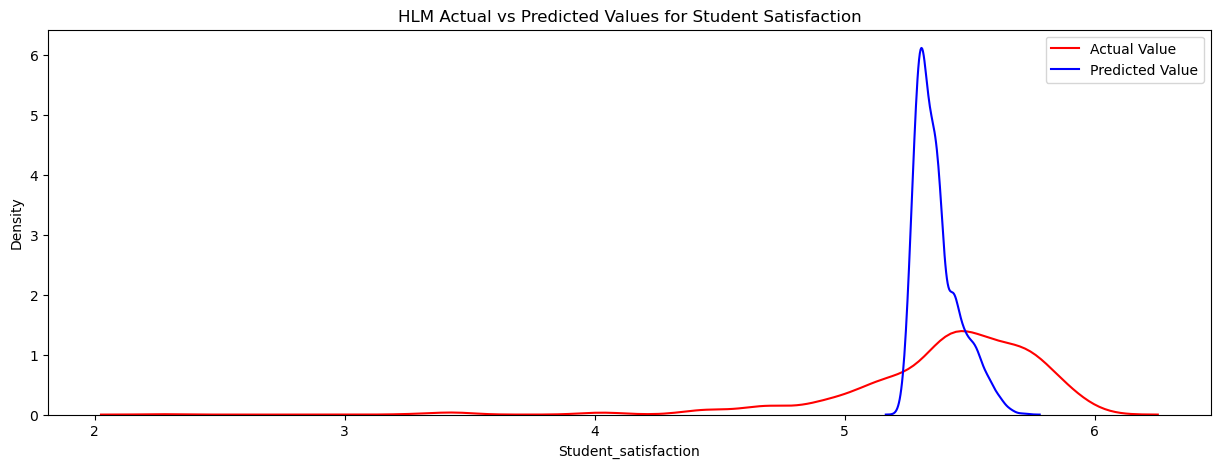

In [118]:
#Graph Actual vs Predicted Values for HLM
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Plotting the actual values
sns.kdeplot(test_actual_values, color="r", label="Actual Value")

# Plotting the predicted values
sns.kdeplot(test_predictions, color="b", label="Predicted Value")

plt.title('HLM Actual vs Predicted Values for Student Satisfaction')
plt.legend()

plt.show()
plt.close()


In [119]:
##Prepare data for MERF & RF
#clean data to include only what we need
data1=data[["Student_satisfaction","ResponseRate","EngagementScore","ActiveTimeScore","currentscore", 
            "TotalTimesViewed", "TotalTimesParticipated", "TotalTimesViewHours", 
           "Modality", "Enrollments", "TEP_Level", "Degree", "GPA", "GPAHours", "InState", "Level", "TermAdmit", 
           "Status", "Gender", "International", "Race", "teachyear",
          "PROGRAMcoded"]]
##clean data to include only what we need
data12023=data2023[["Student_satisfaction","ResponseRate","EngagementScore","ActiveTimeScore","currentscore", 
            "TotalTimesViewed", "TotalTimesParticipated", "TotalTimesViewHours", 
           "Modality", "Enrollments", "TEP_Level", "Degree", "GPA", "GPAHours", "InState", "Level", "TermAdmit", 
           "Status", "Gender", "International", "Race", "teachyear",
          "PROGRAMcoded"]]

#####################################################

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming X is your original 2022 DataFrame
categorical_columns = [col for col in data1.columns if data1[col].dtype == "O"]

# Create a column transformer with OneHotEncoder for categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), categorical_columns)],
                       remainder='passthrough')

# Transform the data
transformed_data = ct.fit_transform(data1)

# Get the one-hot encoded column names from OneHotEncoder
ohe_feature_names = ct.named_transformers_['encoder'].get_feature_names_out(input_features=categorical_columns)

# Combine the one-hot encoded column names with the remainder column names
feature_names = list(ohe_feature_names) + [col for col in data1.columns if col not in categorical_columns]

# Create a DataFrame from the transformed data with proper column names
transformed_df = pd.DataFrame(transformed_data, columns=feature_names)

####################################################
# Assuming X is your original 2023 DataFrame
categorical_columns = [col for col in data1.columns if data1[col].dtype == "O"]

# Create a column transformer with OneHotEncoder for categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), categorical_columns)],
                       remainder='passthrough')

# Transform the data
transformed_data = ct.fit_transform(data12023)

# Get the one-hot encoded column names from OneHotEncoder
ohe_feature_names = ct.named_transformers_['encoder'].get_feature_names_out(input_features=categorical_columns)

# Combine the one-hot encoded column names with the remainder column names
feature_names = list(ohe_feature_names) + [col for col in data1.columns if col not in categorical_columns]

# Create a DataFrame from the transformed data with proper column names
transformed_df2023 = pd.DataFrame(transformed_data, columns=feature_names)

C:\Users\Jackie.Shi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Jackie.Shi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [120]:
import time
import psutil
from merf import MERF
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Start time
start_time = time.time()

# Assuming 'PROGRAMcoded' is the cluster variable and 'Student_satisfaction' is the dependent variable
# Replace with the actual column names in your DataFrame
cluster_variable = 'PROGRAMcoded'
dependent_variable = 'Student_satisfaction'

# Drop the 'PROGRAMcoded' and 'Student_satisfaction' columns from the DataFrame
X = transformed_df.drop(columns=[cluster_variable, dependent_variable])
y = transformed_df['Student_satisfaction']

# Assuming 'dependent_variable' is your dependent variable
X_train = transformed_df.drop(columns=[cluster_variable, dependent_variable])
y_train = transformed_df[dependent_variable]

X_test = transformed_df2023.drop(columns=[cluster_variable, dependent_variable])
y_test = transformed_df2023[dependent_variable]

# Create MERF model with 10 iterations (you can adjust as needed)
#n_estimators=300, can not adjust
merf_model = MERF( max_iterations=10) 

# Assuming 'PROGRAMcoded' is the column you want to use as the cluster
clusters_train = data1[cluster_variable]
clusters_test = data12023[cluster_variable]

#Z is random slope
Z_train = np.ones(shape=(X_train.shape[0],1))
Z_test = np.ones(shape=(X_test.shape[0],1))


# List of features seen during training
seen_features_training = X_train.columns.tolist()

# List of features seen during prediction
seen_features_prediction = X_test.columns.tolist()

# Features seen during training but missing during prediction (unseen)
unseen_features = list(set(seen_features_training) - set(seen_features_prediction))

# Features present during prediction but not seen during training (unmatched)
unmatched_features = list(set(seen_features_prediction) - set(seen_features_training))

print("Features seen during training but missing during prediction:")
print(unseen_features)

print("\nFeatures present during prediction but not seen during training:")
print(unmatched_features)



# Fit MERF model on the training data
merf_model.fit(X_train, Z_train, clusters_train, y_train)

# Make predictions on the test set
merf_predictions = merf_model.predict(X_test, Z_test, clusters=clusters_test)

# Calculate evaluation metrics
merf_mae = mean_absolute_error(y_test, merf_predictions)
merf_mse = mean_squared_error(y_test, merf_predictions)
merf_rmse = mean_squared_error(y_test, merf_predictions, squared=False)

# End time
end_time = time.time()
merf_runtime = end_time - start_time

# RAM usage
merf_ram_usage = psutil.virtual_memory().used

# Print evaluation metrics
print("Mean Absolute Error (MAE) for MERF on the test set:", merf_mae)
print("Mean Squared Error (MSE) for MERF on the test set:", merf_mse)
print("Root Mean Squared Error (RMSE) for MERF on the test set:", merf_rmse)
print("Runtime:", merf_runtime, "seconds")
print("RAM Usage:", merf_ram_usage, "bytes")


Features seen during training but missing during prediction:
[]

Features present during prediction but not seen during training:
[]


INFO     [merf.py:307] Training GLL is -12487.891768610074 at iteration 1.
INFO     [merf.py:307] Training GLL is -17170.48881417617 at iteration 2.
INFO     [merf.py:307] Training GLL is -17245.102694507066 at iteration 3.
INFO     [merf.py:307] Training GLL is -17245.299369250515 at iteration 4.
INFO     [merf.py:307] Training GLL is -17250.6439791214 at iteration 5.
INFO     [merf.py:307] Training GLL is -17176.21030236595 at iteration 6.
INFO     [merf.py:307] Training GLL is -17429.610618692273 at iteration 7.
INFO     [merf.py:307] Training GLL is -17184.531865048702 at iteration 8.
INFO     [merf.py:307] Training GLL is -17379.369961660064 at iteration 9.
INFO     [merf.py:307] Training GLL is -17373.84783245185 at iteration 10.


Mean Absolute Error (MAE) for MERF on the test set: 0.3166263926787362
Mean Squared Error (MSE) for MERF on the test set: 0.18857451729390218
Root Mean Squared Error (RMSE) for MERF on the test set: 0.4342516750617114
Runtime: 47.96772289276123 seconds
RAM Usage: 17308598272 bytes


In [121]:
#### CROSS-VALIDATED training
import pandas as pd  # Make sure to import pandas
import time
import psutil
import numpy as np
from merf import MERF
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Start time
start_time = time.time()

# Assuming `transformed_df` and `transformed_df2023` are your DataFrame containing the data
# Prepare your data
X = transformed_df.drop(columns=['PROGRAMcoded', 'Student_satisfaction'])
y = transformed_df['Student_satisfaction']
groups = transformed_df['PROGRAMcoded']  # This should be a Series already

# Initialize Group K-Fold
gkf = GroupKFold(n_splits=5)

# To store evaluation metrics for each fold
mae_list = []
mse_list = []

for train_index, test_index in gkf.split(X, y, groups=groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    groups_train = groups.iloc[train_index]  # This is already a pandas Series
    
    # Initialize and fit MERF
    merf = MERF(max_iterations=10)
    Z_train = np.ones((len(X_train), 1))  # Assuming random effect is simple intercept
    merf.fit(X_train, Z_train, groups_train, y_train)
    
    # Predict on the test set
    Z_test = np.ones((len(X_test), 1))  # Random effects design matrix for the test set
    groups_test = groups.iloc[test_index]  # Ensuring this is also a pandas Series
    y_pred = merf.predict(X_test, Z_test, groups_test)
    
    # Evaluate predictions
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store results
    mae_list.append(mae)
    mse_list.append(mse)

# Calculate average of the recorded metrics
avg_mae = np.mean(mae_list)
avg_mse = np.mean(mse_list)

print("Average MAE:", avg_mae)
print("Average MSE:", avg_mse)

# Ensure groups_2023 is a pandas Series for consistency
groups_2023 = transformed_df2023[cluster_variable]

# Assume X_2023 and y_2023 are prepared from transformed_df2023
X_2023 = transformed_df2023.drop(columns=[cluster_variable, dependent_variable])
y_2023 = transformed_df2023[dependent_variable]

# Assuming `merf` is the best model from the cross-validation
Z_2023 = np.ones((len(X_2023), 1))  # Assuming a simple random effect model with only an intercept
y_pred_2023 = merf.predict(X_2023, Z_2023, groups_2023)

# Compute MAE and MSE
merf_mae_2023 = mean_absolute_error(y_2023, y_pred_2023)
merf_mse_2023 = mean_squared_error(y_2023, y_pred_2023)
print("MAE on transformed_df2023:", merf_mae_2023)
print("MSE on transformed_df2023:", merf_mse_2023)

# Compute MAPE
merf_mape_2023 = mean_absolute_percentage_error(y_2023, y_pred_2023)
print("MAPE on transformed_df2023:", merf_mape_2023)

# End time and RAM usage
end_time = time.time()
merf_runtime = end_time - start_time
merf_ram_usage = psutil.virtual_memory().used
print(f"Runtime: {merf_runtime} seconds")
print(f"RAM Usage: {merf_ram_usage} bytes")


INFO     [merf.py:307] Training GLL is -9826.928913460066 at iteration 1.
INFO     [merf.py:307] Training GLL is -12745.020262994209 at iteration 2.
INFO     [merf.py:307] Training GLL is -12620.937922653553 at iteration 3.
INFO     [merf.py:307] Training GLL is -12697.63633152992 at iteration 4.
INFO     [merf.py:307] Training GLL is -12515.03620940804 at iteration 5.
INFO     [merf.py:307] Training GLL is -12651.59818931473 at iteration 6.
INFO     [merf.py:307] Training GLL is -12683.45700517676 at iteration 7.
INFO     [merf.py:307] Training GLL is -12567.936245713632 at iteration 8.
INFO     [merf.py:307] Training GLL is -12682.476421744817 at iteration 9.
INFO     [merf.py:307] Training GLL is -12659.40295781706 at iteration 10.
INFO     [merf.py:307] Training GLL is -9903.084854714038 at iteration 1.
INFO     [merf.py:307] Training GLL is -14268.281507179765 at iteration 2.
INFO     [merf.py:307] Training GLL is -14398.573484175748 at iteration 3.
INFO     [merf.py:307] Training

Average MAE: 0.308295234435086
Average MSE: 0.15303058740039255
MAE on transformed_df2023: 0.296501225721149
MSE on transformed_df2023: 0.1758263927473028
MAPE on transformed_df2023: 0.05867041348042796
Runtime: 184.6632580757141 seconds
RAM Usage: 17085960192 bytes


In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#R square for predicted values
merf_r2 = r2_score(y_2023, y_pred_2023)
merf_r2

-0.10592593646607695

In [123]:


# Calculate the standard deviation of the actual values
std_dev = np.std(y_2023)

# Define the tolerance as one standard deviation
tolerance = std_dev

# Calculate the absolute errors between predictions and true values
absolute_errors = np.abs(y_pred_2023 - y_2023)

# Count the number of predictions within the tolerance (one standard deviation)
accurate_predictions = np.sum(absolute_errors <= tolerance)

# Calculate the accuracy within the tolerance
merf_accuracy_within_tolerance = accurate_predictions / len(y_2023)

print("Standard Deviation of Actual Values:", std_dev)
print("Accuracy within one standard deviation (tolerance): {:.2f}".format(merf_accuracy_within_tolerance))



Standard Deviation of Actual Values: 0.39873009061498627
Accuracy within one standard deviation (tolerance): 0.74


In [124]:
# Define the tolerance 0.289 is mean of MAE
tolerance = 0.289
absolute_errors = np.abs(y_pred_2023 - y_2023)
accurate_predictions = np.sum(absolute_errors <= tolerance)
merf_accuracy_within_tolerance1 = accurate_predictions / len(y_2023)
merf_accuracy_within_tolerance1

0.5731862537123462

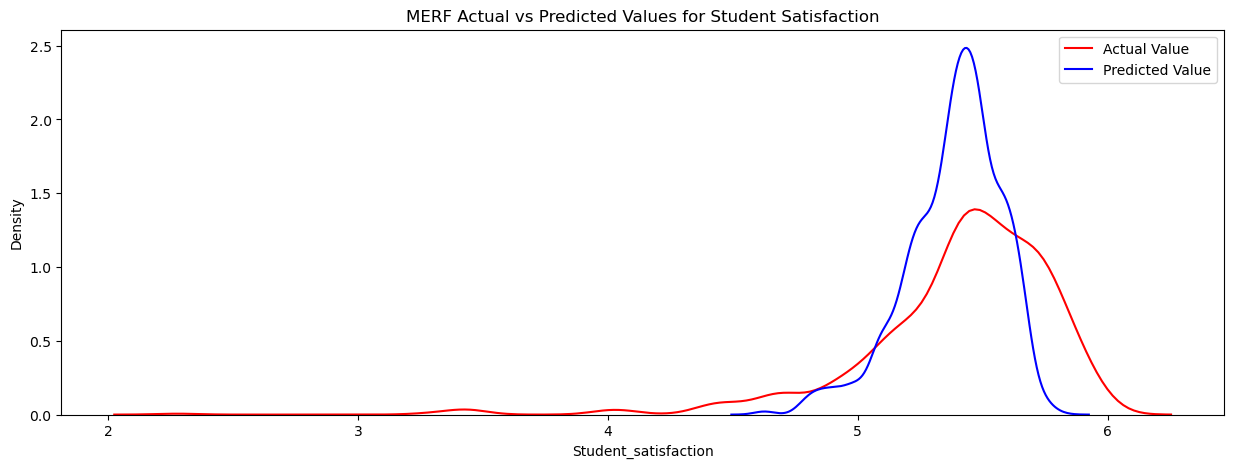

In [125]:
##Graph actual vs predicted values for MERF
plt.figure(figsize=(15, 5))

# Plotting the actual values
sns.kdeplot(y_2023, color="r", label="Actual Value")

# Plotting the predicted values
sns.kdeplot(y_pred_2023, color="b", label="Predicted Value")

plt.title('MERF Actual vs Predicted Values for Student Satisfaction')
plt.legend()

plt.show()
plt.close()

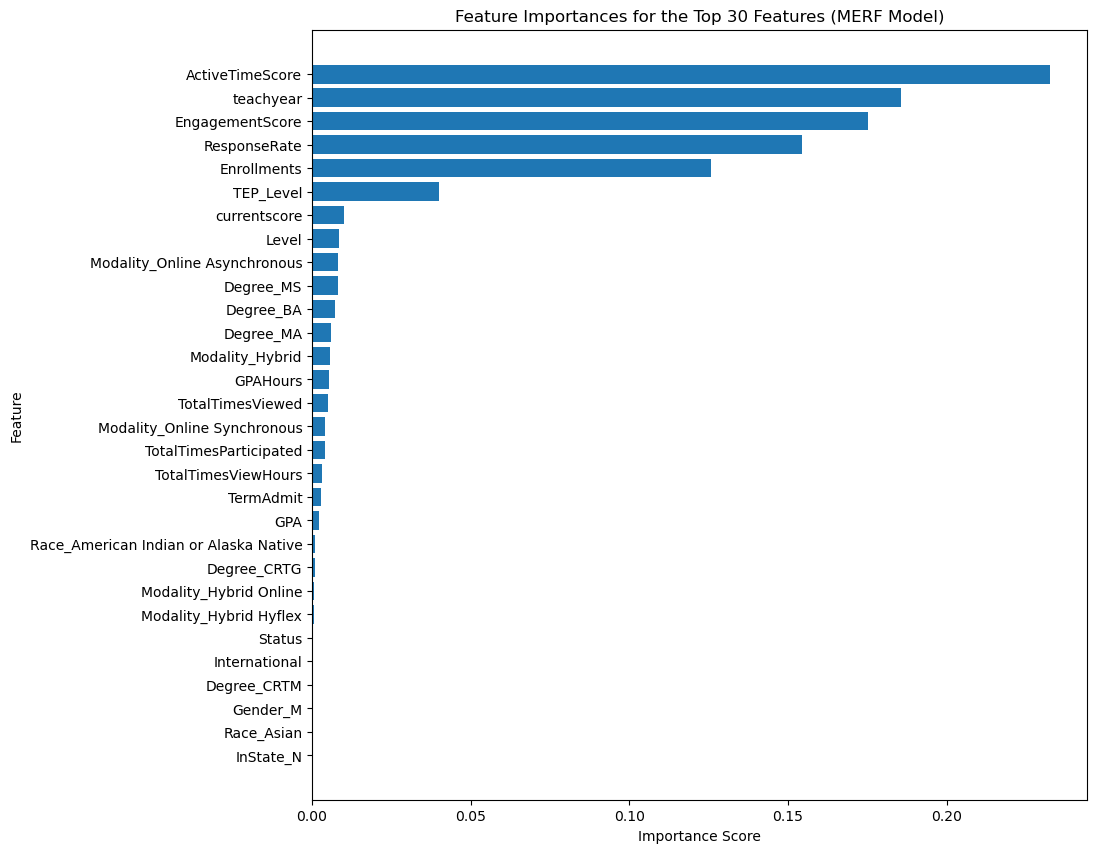

In [126]:
# Graph importance score

# Get the fitted fixed effects model from the MERF model
fixed_effects_model = merf.fe_model

# Get the feature importances from the fixed effects model
feature_importances = fixed_effects_model.feature_importances_

# Create a DataFrame to store feature importances with corresponding feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the importance scores for the top 30 features with switched axes
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'][:30], importance_df['Importance'][:30])
plt.ylabel('Feature')
plt.xlabel('Importance Score')
plt.title('Feature Importances for the Top 30 Features (MERF Model)')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()





In [127]:
###############
#Random Forest model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
import time
import psutil

# Start time
start_time = time.time()

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train are your training datasets
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30]
}

rf_model = RandomForestRegressor(random_state=42)
cv_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
cv_rf.fit(X_train, y_train)

# After tuning, evaluate on the test dataset
best_rf = cv_rf.best_estimator_
y_pred = best_rf.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

re_model=best_rf

# Train Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)

# End time
end_time = time.time()
rf_runtime = end_time - start_time

# RAM usage
rf_ram_usage = psutil.virtual_memory().used

# Calculate accuracy within a tolerance level
# Calculate the standard deviation of the actual values
std_dev = np.std(y_test)

# Define the tolerance as mean MAE across HLM RF & MER
tolerance = 0.289
absolute_errors = np.abs(rf_predictions - y_test)
accurate_predictions = np.sum(absolute_errors <= tolerance)
rf_accuracy_within_tolerance = accurate_predictions / len(y_test)

# Print evaluation metrics
print("Random Forest Evaluation Metrics:")
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("MAPE:", rf_mape)
print("Accuracy within tolerance (tolerance={}): {:.2%}".format(tolerance, rf_accuracy_within_tolerance))
print("Runtime:", rf_runtime, "seconds")
print("RAM Usage:", rf_ram_usage, "bytes")


C:\Users\Jackie.Shi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jackie.Shi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jackie.Shi\Anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Jackie.Shi\Anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Jackie.Shi\An

Test MSE: 0.10102742231620736
Random Forest Evaluation Metrics:
Mean Absolute Error (MAE): 0.2652734186367425
Mean Squared Error (MSE): 0.12465371151735881
Root Mean Squared Error (RMSE): 0.3530633250811514
MAPE: 0.05063920570790288
Accuracy within tolerance (tolerance=0.289): 63.73%
Runtime: 89.02618741989136 seconds
RAM Usage: 16887144448 bytes


In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#R square for predicted values
rf_r2 = r2_score(y_2023, y_pred_2023)
rf_r2

-0.10592593646607695

In [130]:
# Create a DataFrame to check predction output to Excel
data_2023 = {
    "Actual Values": y_2023,
    "Predicted Values": y_pred_2023
}

df_2023 = pd.DataFrame(data_2023)
df_2023['Absolute Error'] = abs(df_2023['Actual Values'] - df_2023['Predicted Values'])

# Save to Excel
excel_path = 'RF Predictions comparison_2023.xlsx'
df_2023.to_excel(excel_path, index=False)

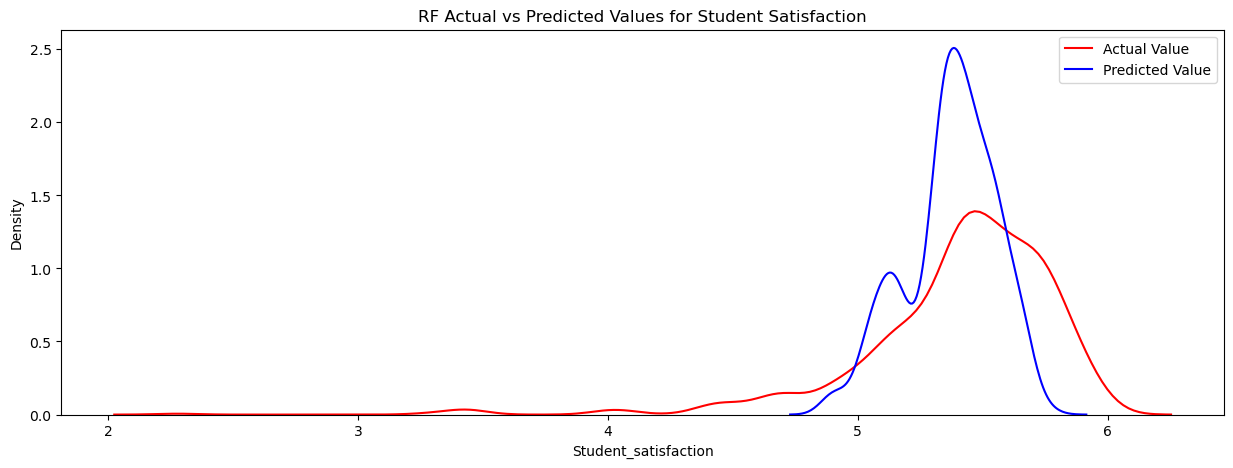

In [131]:
plt.figure(figsize=(15, 5))

# Plotting the actual values
sns.kdeplot(y_2023, color="r", label="Actual Value")

# Plotting the predicted values
sns.kdeplot(rf_predictions, color="b", label="Predicted Value")

plt.title('RF Actual vs Predicted Values for Student Satisfaction')
plt.legend()

plt.show()
plt.close()

In [132]:
# Check RF tolerance. Define the tolerance 0.289 is the mean MAE across these three models
tolerance = 0.289
absolute_errors = np.abs(rf_predictions - y_test)
accurate_predictions = np.sum(absolute_errors <= tolerance)
rf_accuracy_within_tolerance1 = accurate_predictions / len(y_test)
rf_accuracy_within_tolerance1

0.6372745490981964

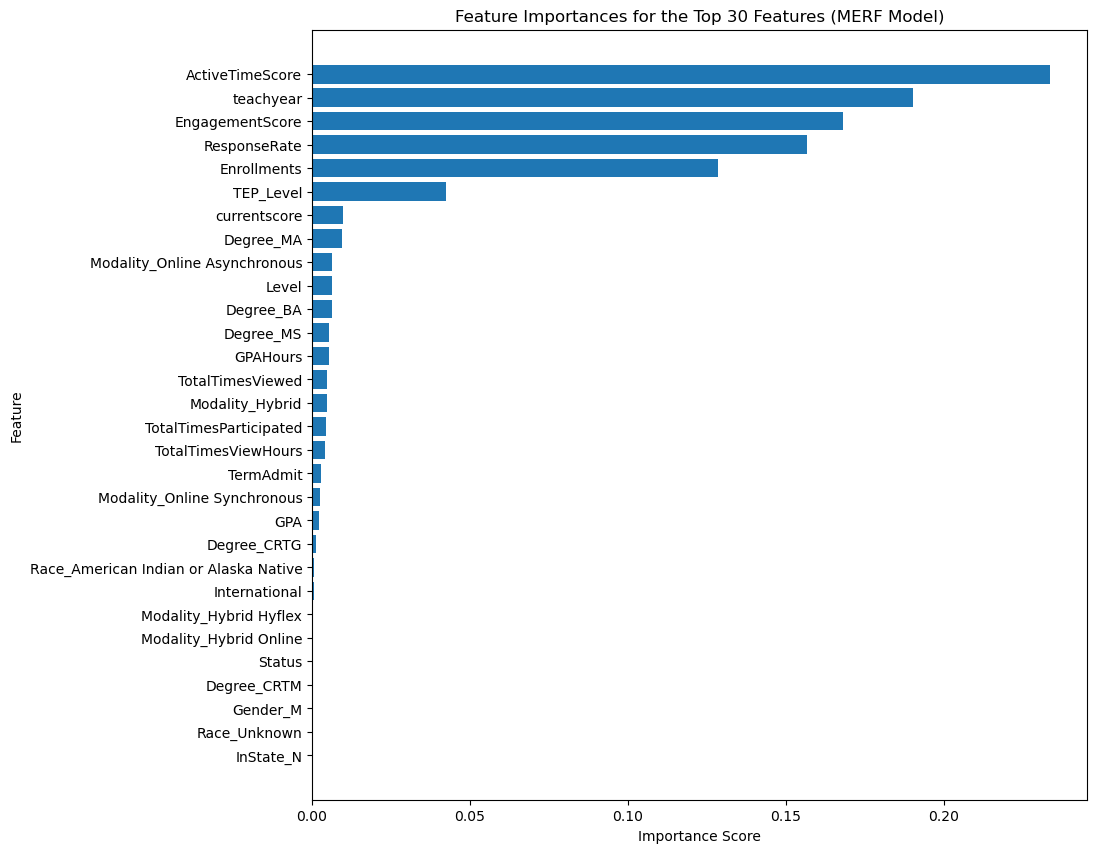

In [133]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances with corresponding feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the importance scores for the top 30 features with switched axes
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'][:30], importance_df['Importance'][:30])
plt.ylabel('Feature')
plt.xlabel('Importance Score')
plt.title('Feature Importances for the Top 30 Features (MERF Model)')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


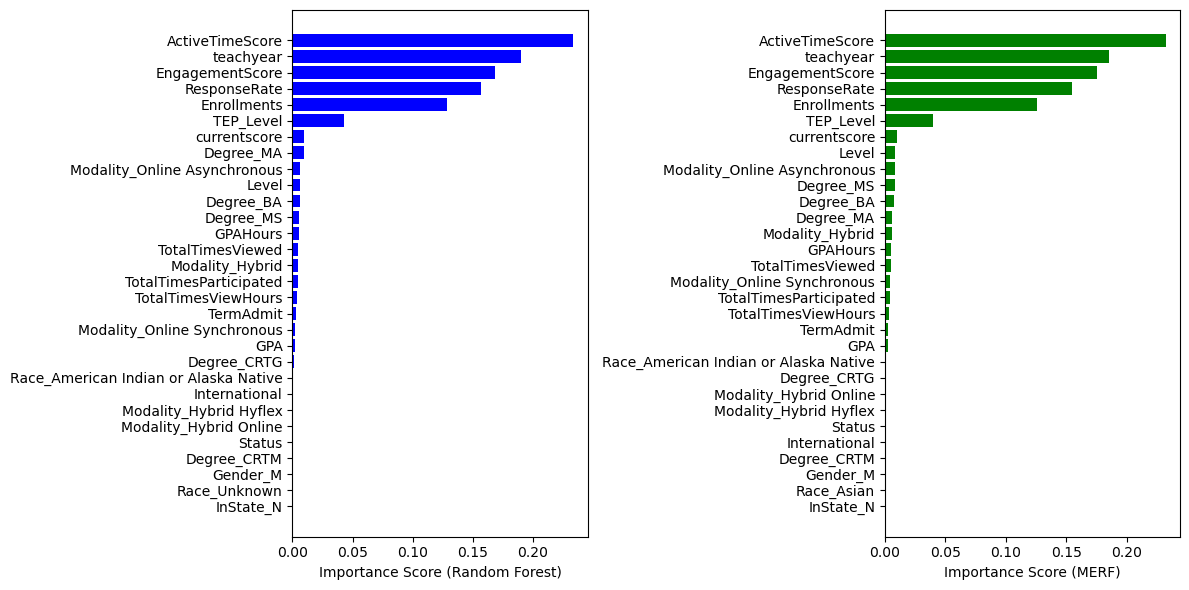

In [134]:
# Get feature importances from the trained Random Forest model
rf_feature_importances = rf_model.feature_importances_

# Create a DataFrame to store Random Forest feature importances with corresponding feature names
rf_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_feature_importances})

# Sort the Random Forest DataFrame by importance values in descending order
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Plot the importance scores for the top 30 features with Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(rf_importance_df['Feature'][:30], rf_importance_df['Importance'][:30], color='blue')
plt.xlabel('Importance Score (Random Forest)')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top

# Get the feature importances from the MERF model
merf_feature_importances = fixed_effects_model.feature_importances_

# Create a DataFrame to store MERF feature importances with corresponding feature names
merf_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': merf_feature_importances})

# Sort the MERF DataFrame by importance values in descending order
merf_importance_df = merf_importance_df.sort_values(by='Importance', ascending=False)

# Plot the importance scores for the top 30 features with MERF
plt.subplot(1, 2, 2)
plt.barh(merf_importance_df['Feature'][:30], merf_importance_df['Importance'][:30], color='green')
plt.xlabel('Importance Score (MERF)')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


https://towardsdatascience.com/mixed-effects-random-forests-6ecbb85cb177
On why MERF is better than RF:
For our experiments, we choose various values for m, sigma_e, and sigma_b and generated 500 samples from 100 different unbalanced clusters. We summarize the values in the table below, but the specific values are not that important. What matters are two derived parameters, the percentage total effects variance (PTEV) and the percentage random effects variance (PREV). They are defined in detail in the paper, but intuitively they are:

PTEV = the amount of total variance that is not due to random noise. The higher it is, the more predictable the output y is.
PREV = the amount of PTEV that is due to random effect. The higher is it, the larger random effect there is.
We did an experiment comparing MERF to two competitors:

a random forest that does not take random effects into account, i.e. fitting a random forest on only X.
a random forest that includes one hot encoded cluster id as features, i.e. we create k new one hot encoded features, X_ohe, and join that with X and train a random forest on the combined [X, X_ohe] feature matrix.
We varied PTEV and PREV for the experiments and assessed performance on two different test sets:

test set consists of known clusters that the model trained on
test set consisted of new (unknown) clusters that the model had no knowledge of at training time
We use the average mean squared error (MSE) over 10 runs as our error metric. We define the MERF gain as the percentage gain over the compared algorithm:

In [135]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

 # Define function to calculate accuracy for HLM model
def calculate_hlm_accuracy(true_values, predictions):
     r_squared = r2_score(true_values, predictions)
     return r_squared

# Define function to calculate runtime and RAM usage
def calculate_runtime_ram():
     start_time = time.time()
     _ = 0  # Placeholder operation to mimic model fitting
     end_time = time.time()
     runtime = end_time - start_time
     ram_usage = psutil.virtual_memory().used
     return runtime, ram_usage

# # Calculate evaluation metrics for MERF model
# merf_mae = mean_absolute_error(y_test, merf_predictions)
# merf_mse = mean_squared_error(y_test, merf_predictions)
# merf_rmse = mean_squared_error(y_test, merf_predictions, squared=False)


# # Calculate evaluation metrics for Random Forest model
# rf_mae = mean_absolute_error(y_test, rf_predictions)
# rf_mse = mean_squared_error(y_test, rf_predictions)
# rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)


# Calculate evaluation metrics for HLM model
hlm_mae = mean_absolute_error(data2023['Student_satisfaction'], test_predictions)
hlm_mse = mean_squared_error(data2023['Student_satisfaction'], test_predictions)
hlm_rmse = mean_squared_error(data2023['Student_satisfaction'], test_predictions, squared=False)
hlm_mape = mean_absolute_percentage_error(data2023['Student_satisfaction'], test_predictions)
hlm_runtime, hlm_ram_usage = calculate_runtime_ram()


def calculate_hlm_accuracy_with_tolerance(true_values, predictions, tolerance):
    # Calculate absolute error
    absolute_error = np.abs(predictions - true_values)
    # Count predictions within tolerance range
    within_tolerance_count = np.sum(absolute_error <= tolerance)
    # Calculate total number of predictions
    total_predictions = len(predictions)
    # Calculate accuracy
    accuracy = within_tolerance_count / total_predictions
    return accuracy

# Calculate HLM accuracy with tolerance of 0.4 SD for Student Satisfaction
hlm_accuracy_with_tolerance = calculate_hlm_accuracy_with_tolerance(data2023['Student_satisfaction'], test_predictions, tolerance=0.289)



In [136]:
#R square for predicted values
HLM_r2 = r2_score(data2023['Student_satisfaction'], test_predictions)
HLM_r2

-0.011667291674948288

In [138]:
#Set tolerance to be mean MAPE
hlm_accuracy = calculate_hlm_accuracy_with_tolerance(data2023['Student_satisfaction'], test_predictions, tolerance=0.289)
hlm_accuracy

0.605006364022062

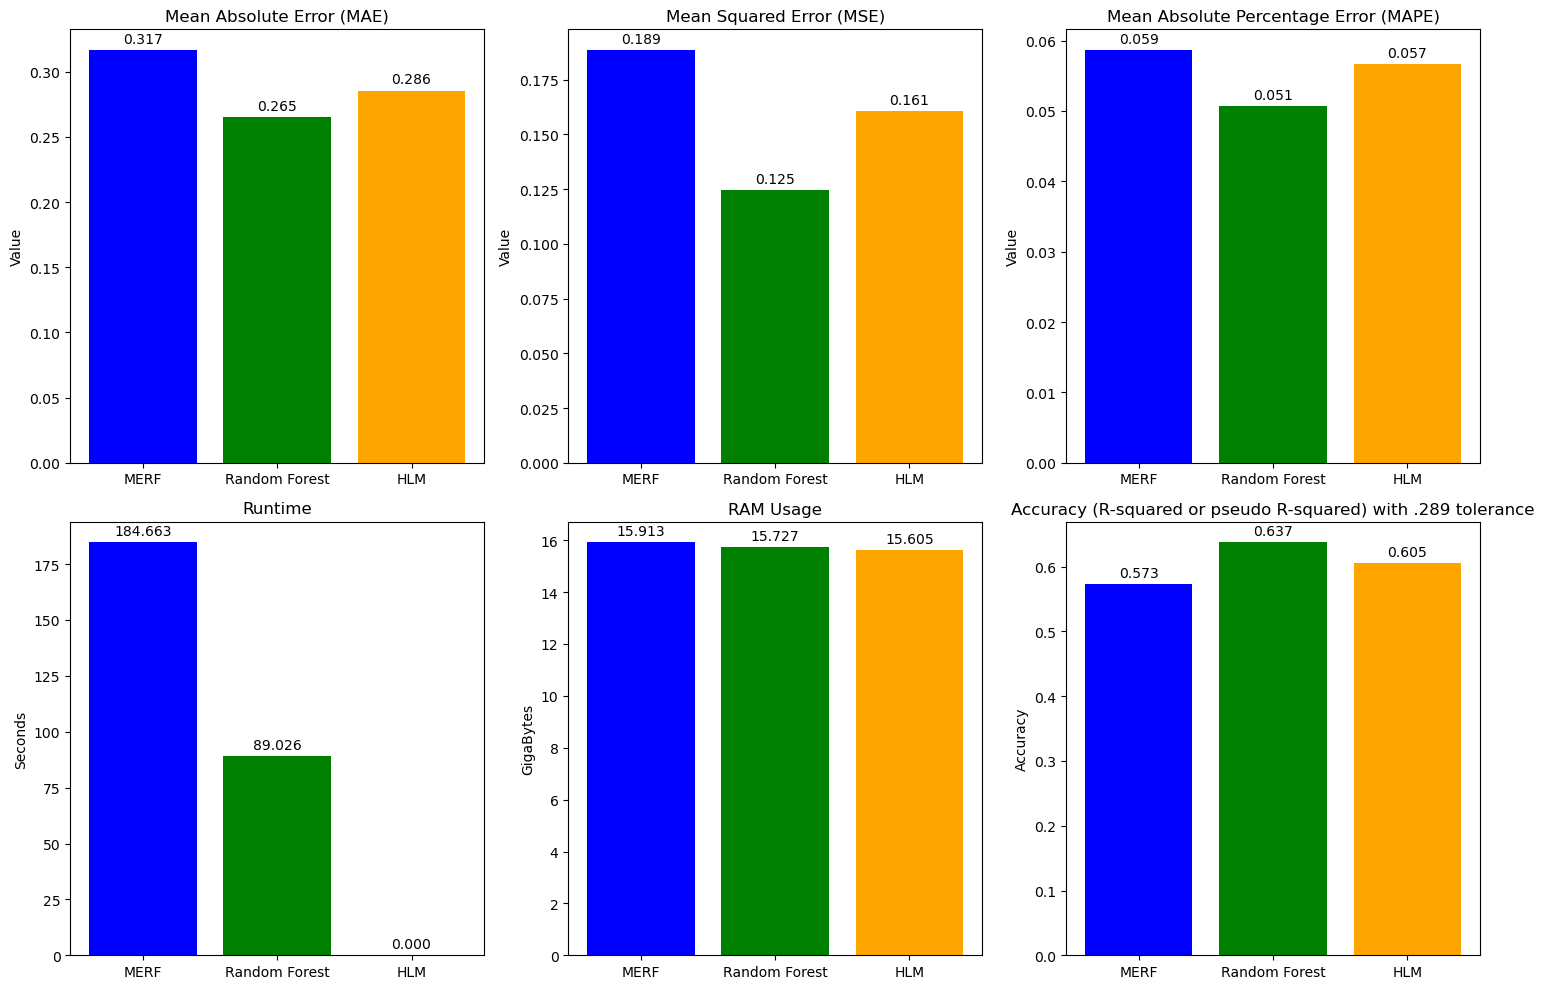

In [139]:
import matplotlib.pyplot as plt

# Create a new figure
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot MAE
bar_mae = axs[0, 0].bar([0, 1, 2], [merf_mae, rf_mae, hlm_mae], color=['blue', 'green', 'orange'], label=['MERF', 'Random Forest', 'HLM'])
axs[0, 0].set_title('Mean Absolute Error (MAE)')
axs[0, 0].set_xticks([0, 1, 2])  # Set positions for the bars
axs[0, 0].set_xticklabels(['MERF', 'Random Forest', 'HLM'])  # Set labels for the bars
axs[0, 0].set_ylabel('Value')  # Set y-axis label
for rect in bar_mae:
    height = rect.get_height()
    axs[0, 0].annotate('{:.3f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Plot MSE
bar_mse = axs[0, 1].bar([0, 1, 2], [merf_mse, rf_mse, hlm_mse], color=['blue', 'green', 'orange'], label=['MERF', 'Random Forest', 'HLM'])
axs[0, 1].set_title('Mean Squared Error (MSE)')
axs[0, 1].set_xticks([0, 1, 2])  # Set positions for the bars
axs[0, 1].set_xticklabels(['MERF', 'Random Forest', 'HLM'])  # Set labels for the bars
axs[0, 1].set_ylabel('Value')  # Set y-axis label
for rect in bar_mse:
    height = rect.get_height()
    axs[0, 1].annotate('{:.3f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Plot MAPE
bar_mape = axs[0, 2].bar([0, 1, 2], [merf_mape_2023, rf_mape, hlm_mape], color=['blue', 'green', 'orange'], label=['MERF', 'Random Forest', 'HLM'])
axs[0, 2].set_title('Mean Absolute Percentage Error (MAPE)')
axs[0, 2].set_xticks([0, 1, 2])  # Set positions for the bars
axs[0, 2].set_xticklabels(['MERF', 'Random Forest', 'HLM'])  # Set labels for the bars
axs[0, 2].set_ylabel('Value')  # Set y-axis label
for rect in bar_mape:
    height = rect.get_height()
    axs[0, 2].annotate('{:.3f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Plot Runtime
bar_runtime = axs[1, 0].bar([0, 1, 2], [merf_runtime, rf_runtime, hlm_runtime], color=['blue', 'green', 'orange'], label=['MERF', 'Random Forest', 'HLM'])
axs[1, 0].set_title('Runtime')
axs[1, 0].set_xticks([0, 1, 2])  # Set positions for the bars
axs[1, 0].set_xticklabels(['MERF', 'Random Forest', 'HLM'])  # Set labels for the bars
axs[1, 0].set_ylabel('Seconds')  # Set y-axis label
for rect in bar_runtime:
    height = rect.get_height()
    axs[1, 0].annotate('{:.3f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Convert RAM usage to gigabytes
merf_ram_usage_gb = merf_ram_usage / (1024 ** 3)
rf_ram_usage_gb = rf_ram_usage / (1024 ** 3)
hlm_ram_usage_gb = hlm_ram_usage / (1024 ** 3)

# Plot RAM Usage
bar_ram_usage = axs[1, 1].bar([0, 1, 2], [merf_ram_usage_gb, rf_ram_usage_gb, hlm_ram_usage_gb], color=['blue', 'green', 'orange'], label=['MERF', 'Random Forest', 'HLM'])
axs[1, 1].set_title('RAM Usage')
axs[1, 1].set_xticks([0, 1, 2])  # Set positions for the bars
axs[1, 1].set_xticklabels(['MERF', 'Random Forest', 'HLM'])  # Set labels for the bars
axs[1, 1].set_ylabel('GigaBytes')  # Set y-axis label
for rect in bar_ram_usage:
    height = rect.get_height()
    axs[1, 1].annotate('{:.3f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Plot Accuracy (R-squared or pseudo R-squared)
bar_accuracy = axs[1, 2].bar([0, 1, 2], [merf_accuracy_within_tolerance1, rf_accuracy_within_tolerance1, hlm_accuracy], color=['blue', 'green', 'orange'], label=['MERF', 'Random Forest', 'HLM'])
axs[1, 2].set_title('Accuracy (R-squared or pseudo R-squared) with .289 tolerance')
axs[1, 2].set_xticks([0, 1, 2])  # Set positions for the bars
axs[1, 2].set_xticklabels(['MERF', 'Random Forest', 'HLM'])  # Set labels for the bars
axs[1, 2].set_ylabel('Accuracy')  # Set y-axis label
for rect in bar_accuracy:
    height = rect.get_height()
    axs[1, 2].annotate('{:.3f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')



plt.tight_layout()
plt.show()


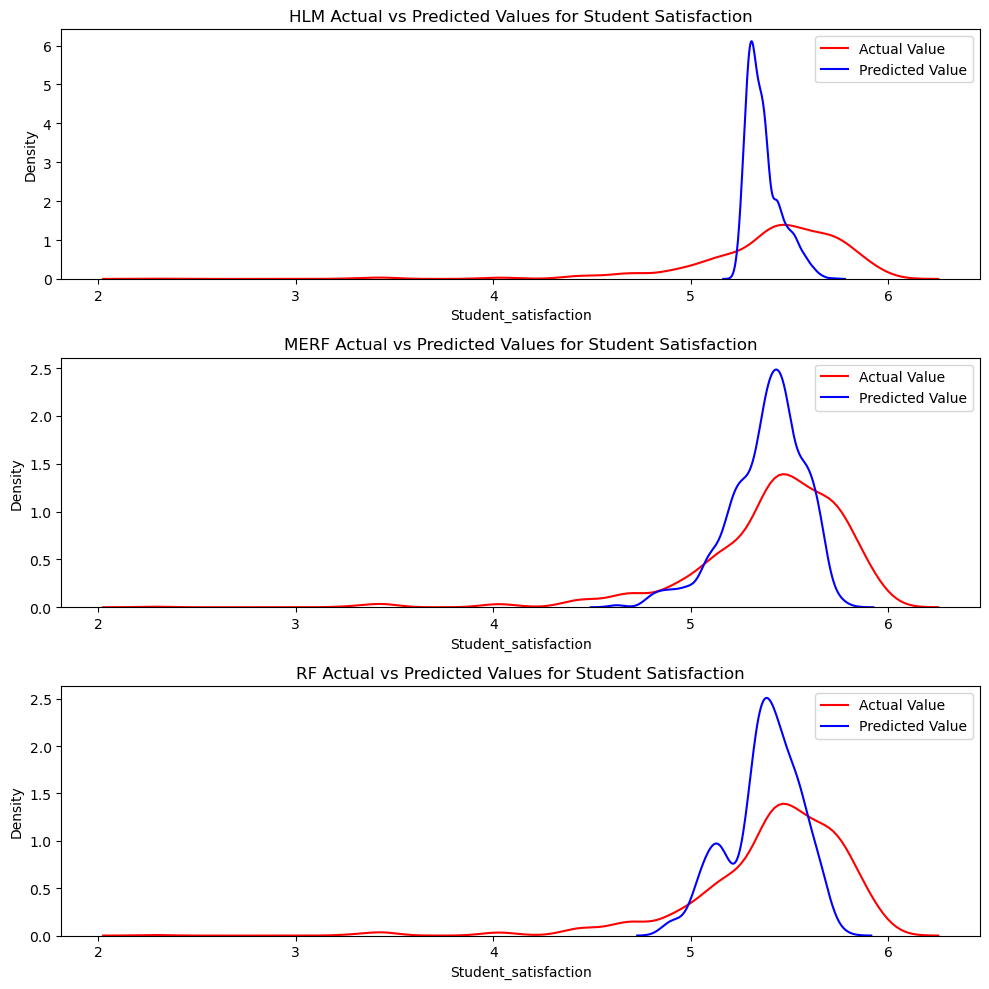

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Graph Actual vs Predicted Values for HLM
sns.kdeplot(y_2023, color="r", label="Actual Value", ax=axes[0])
sns.kdeplot(test_predictions, color="b", label="Predicted Value", ax=axes[0])
axes[0].set_title('HLM Actual vs Predicted Values for Student Satisfaction')
axes[0].legend()

# Graph actual vs predicted values for MERF
sns.kdeplot(y_2023, color="r", label="Actual Value", ax=axes[1])
sns.kdeplot(y_pred_2023, color="b", label="Predicted Value", ax=axes[1])
axes[1].set_title('MERF Actual vs Predicted Values for Student Satisfaction')
axes[1].legend()

# Graph actual vs predicted values for RF
sns.kdeplot(y_2023, color="r", label="Actual Value", ax=axes[2])
sns.kdeplot(rf_predictions, color="b", label="Predicted Value", ax=axes[2])
axes[2].set_title('RF Actual vs Predicted Values for Student Satisfaction')
axes[2].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.close()
